<a href="https://colab.research.google.com/github/FabianParra24/Apredizaje-Automatico/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto: Bank Marketing
# Estudiantes: Nayely Márquez y Fabián Parra

## Fase de comprensión del negocio o problema

Para este estudio se cuenta con la base de clientes desde el 2008 al 2013 de un banco en Portugal (Moro et al., 2014).

Dicha base contiene toda la 
información de estos clientes a través del éxito en llamadas de una campaña de telemarketing y los datos son descargados en la página UCI y son la fuente primaria.

Por medio de técnicas estadísticas, minería de datos y demás se quiere predecir si el cliente tomará el depósito, lo cual nos llevará a concluir que decisiones tomar y sí se recomienda mejorar o no la campaña de este banco.



### Objetivo General:
Se busca encontar el mejor modelo que indique si se toma el depósito a plazo, esto a través de indicadores de precisión que según las características particulares que se tienen de dicha población nos indica el más destacado.

### Producción de un plan del proyecto:

a. Entender los datos y validar su calidad a través de la depuración, descripción, análisis exploratorios con pruebas de normalidad, gráficos de dispersión, medidas resumen,etc.

b. Empezar por eliminar los datos nulos, duplicados o faltantes. Luego, quitar los valres extremos y con un análisis de correlación descartar las variables que explican lo mismo que otras.

c. Realizar la codificación de las variables categóricas y separar los datos en training y testing los datos. 

d. Generar los diversos modelos y dentro de ellos hay varios tipos, por lo que se escogerá el mejor de cada tipo.

e. Una vez generados los modelos se escoge el que tiene las mejores medidas de desempeño con respecto a su precisión.

## Fase de comprensión de los datos


Datos:

Son datos relacionados con campañas de marketing directo de una institución bancaria portuguesa , se subieron a la página UCI y está en formato csv. Las campañas de marketing se basaron en llamadas telefónicas ofreciendo suscripción en un depósito a plazo. 

Se compone por 45211 instancias, 17 atributos y la **Y** se compone de dos clases( si  y no).

Las variables son: 
- 1. age: edad (numérica)
- 2. Job: tipo de trabajo (categórico)
- 3. marital: estado civil (categórico)
- 4. education: Educacion (categórica)
- 5. default: Si tiene crédito en incumplimiento
- 6. housing: Si tiene préstamo para vivienda (categórico)
- 7. loan: Si tiene préstamo personal (categórico)
- 8. contact: Si el contacto fue por celular o teléfono
- 9. month: último mes de contacto del año (categórico)
- 10. day_of_week: último día de contacto de la semana (categórico)
- 11. duration: duración del último contacto en segundos (numérico)
- 12. campain: número de contactos realizados durante esta campaña (numérico)
- 13. pdays: número de días que pasaron después de que el cliente fue contactado por última vez.(numérico)
- 14. previous: número de contactos realizados antes de esta campaña (numérico)
- 15. poutcome: resultado de la campaña de marketing anterior (categórico)
- 16. y: Si el cliente se suscribe en el depósito a plazo (binario)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import statistics as st
#!pip install tabulate
from tabulate import tabulate


In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/FabianParra24/Apredizaje-Automatico/master/bank-full.csv', sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.shape

(45211, 17)

In [ ]:

data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Selección, limpieza y estructuración de los datos

1) Al revisar si existen datos faltantes o nulos y duplicados no se encuentran. 

In [ ]:
data.isnull().values.any()

False

In [ ]:
data.duplicated().sum()

0

In [ ]:

data.drop(data[data['job'] == 'unknown'].index, inplace = True)
data.drop(data[data['education'] == 'unknown'].index, inplace = True)

2) En siguiente lugar verificamos las categorías de los datos categóricos y se elimina de la base la variable duration, ya que no será de utilidad.  

In [ ]:
categorical_features = ['job', 'education', 'marital','default', 'housing', 'loan', 'contact',"month","poutcome"]
num_feautures= ['age', 'balance', 'day', 'campaign', 'pdays',"previous"]

In [ ]:
for categorical_feature in categorical_features:
    print(data[categorical_feature].unique())

['management' 'technician' 'entrepreneur' 'retired' 'admin.' 'services'
 'blue-collar' 'self-employed' 'unemployed' 'housemaid' 'student']
['tertiary' 'secondary' 'primary']
['married' 'single' 'divorced']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']


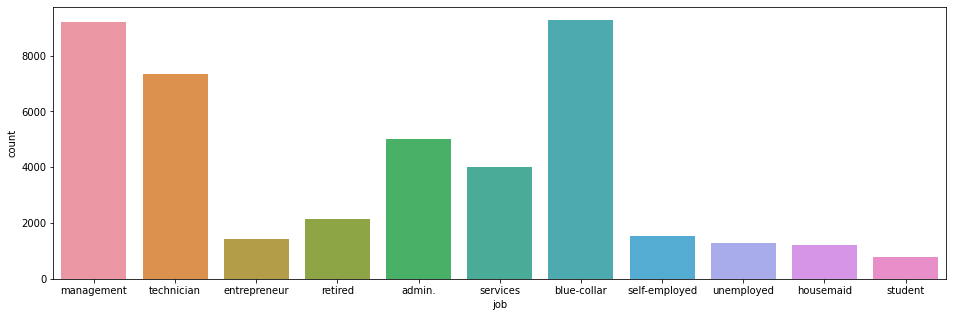

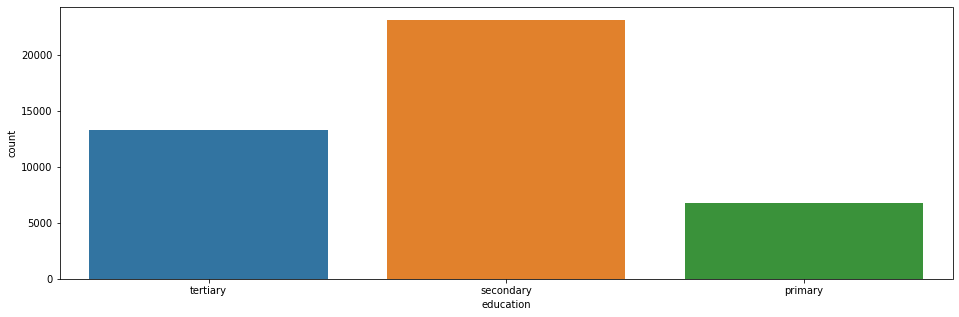

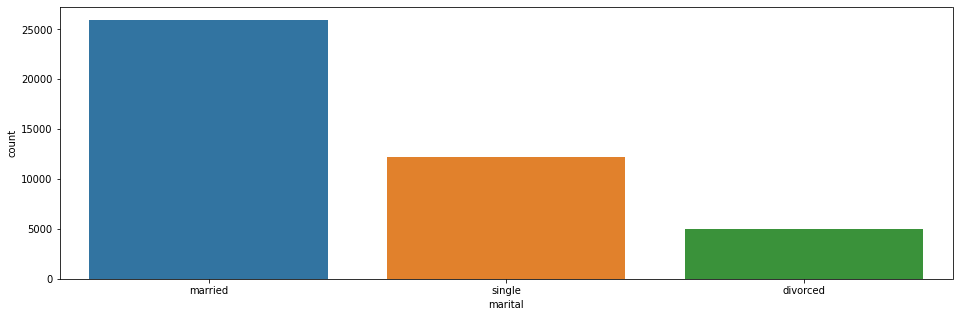

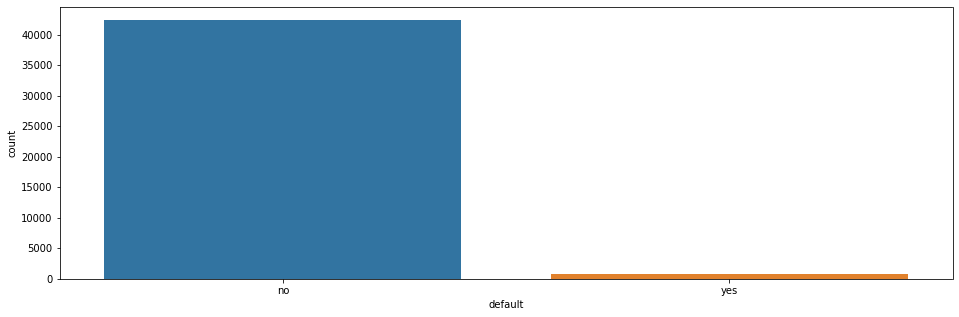

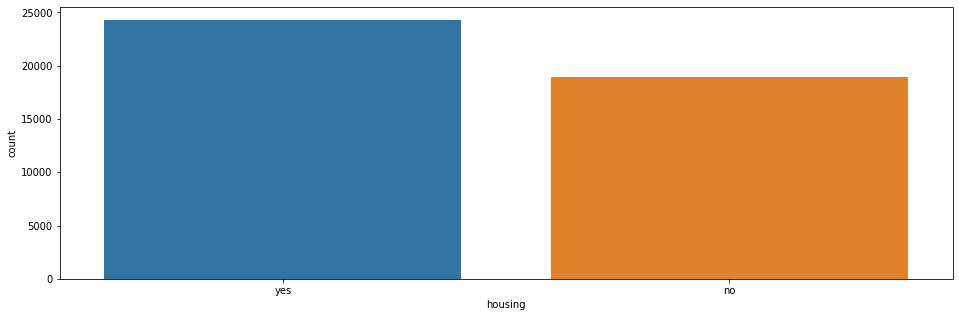

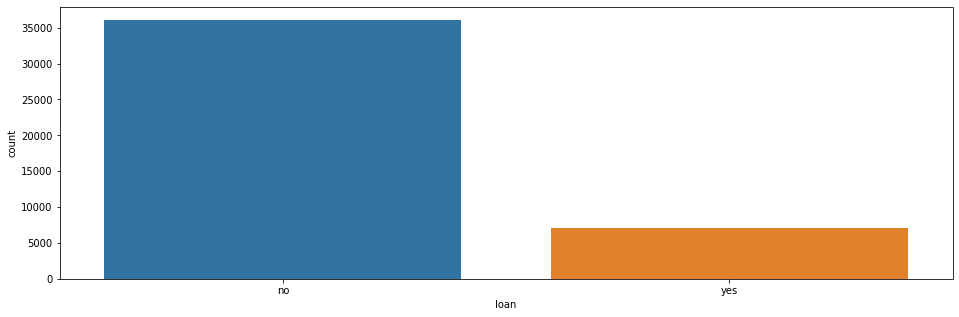

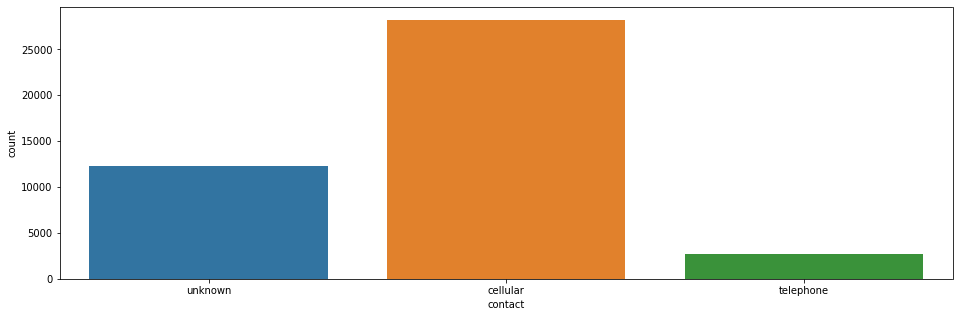

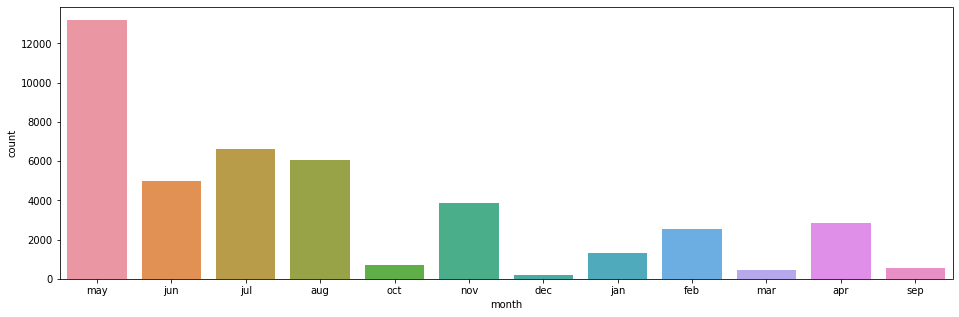

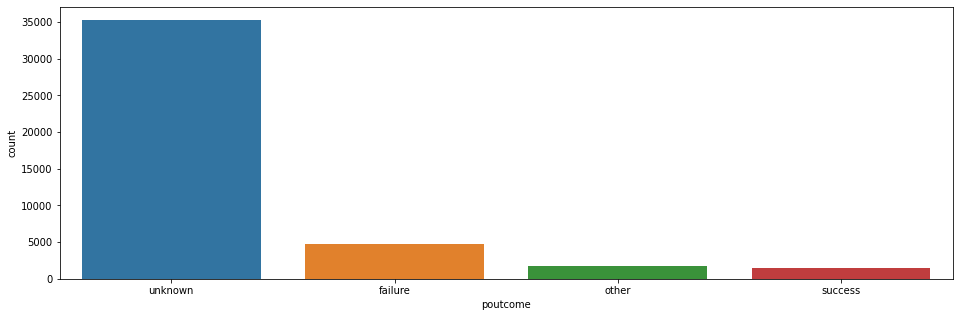

In [ ]:
for i in categorical_features:
    plt.figure(figsize=(16,5))
    sns.countplot(x = data[i])
    plt.show()
   

En la población la mayoría cuenta con secundaria completa, muchos trabajan en managment, blue collar o como técnicos y en claramente pocos son estudiamtes. Por otro lado, en general son casados,no tienen créditos en mora (default), tienen préstamos para pagar la casa,no tienen préstamos, poseen celular y fueron contactados por última vez en mayo.


3) Verificamos los datos extremos para eliminarlos.

In [ ]:
import bokeh as bkh
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics as st


def plot_data(df, col_x, col_y, label_x, label_y, val_title):
    # Imprime gráfica de dispersión. 
    
    plt.figure(figsize=(7,7))
    plt.scatter(x=df[col_x],y=df[col_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(val_title)
    plt.show()

In [ ]:
#plot_data(data, 'age', 'balance', 'age', 'balance','Relación balance - age')
data=data[data.balance <=80000]

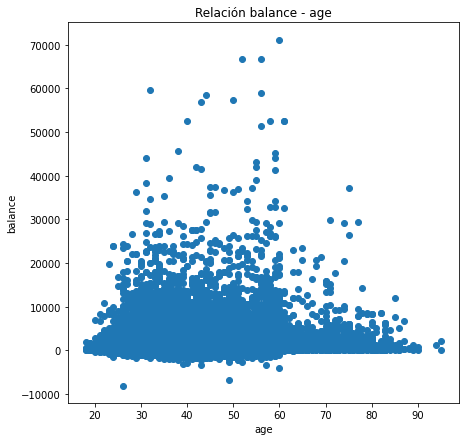

In [ ]:
plot_data(data, 'age', 'balance', 'age', 'balance',
          'Relación balance - age')


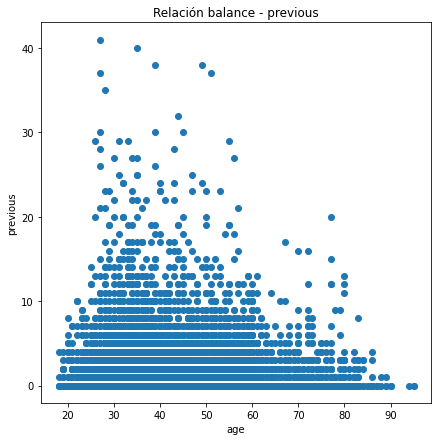

In [ ]:
#plot_data(data, 'age', 'previous', 'age', 'previous','Relación balance - previous')
data=data[data.previous <=50]
plot_data(data, 'age', 'previous', 'age', 'previous',
          'Relación balance - previous')

En los gráficos observamos que son outliers los previous(número de contactos antes de la campaña) mayores a 50 y el balance mayor a 80000.

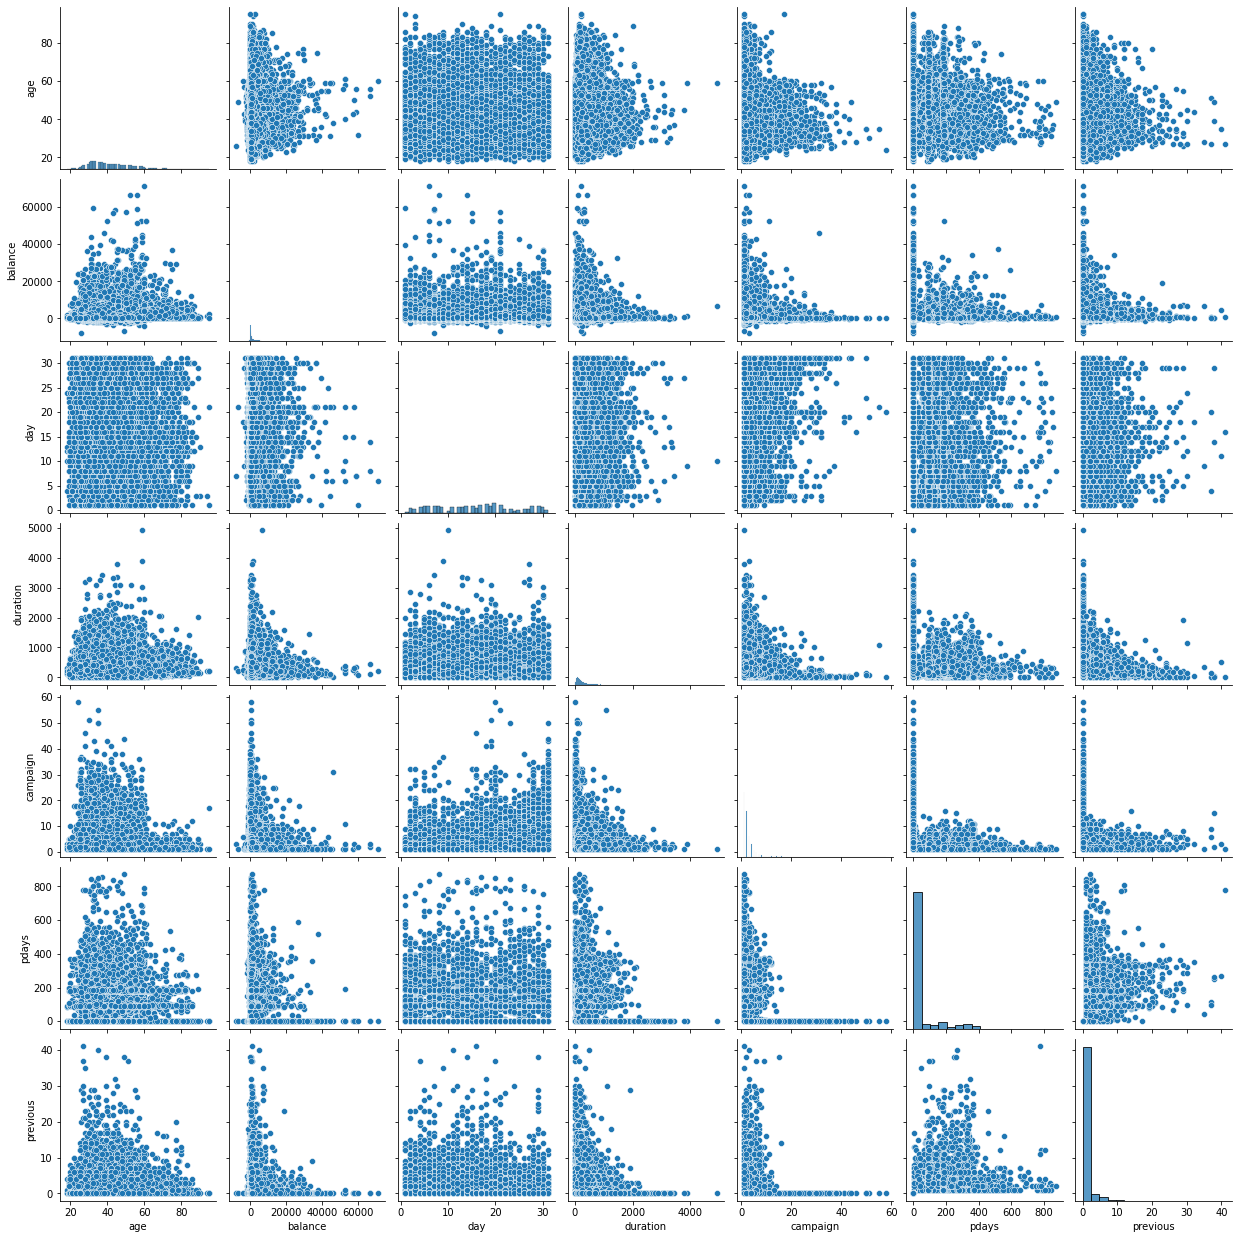

In [ ]:
sns.pairplot(data)
plt.show()

4) Gráfico de calor:

El gráfico de calor nos destaca las correlaciones entre todas las variables, donde colores más fuertes(rojo) representan correlacciones más altas y morado correlaciones bajas.

En este gráfico solo se observa que la única correlación intermedia se da entre pdays y age, pero no es los suficientemente fuerte.

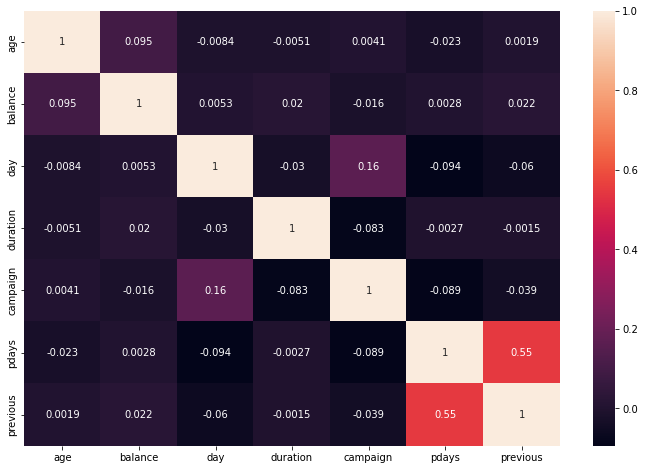

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(data.corr(),annot=True)

Para obtener la base final se seleccionaron las siguientes variables, donde se recodificaron las variables categóricas con números.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_data = data[categorical_features].apply(le.fit_transform)
cat_data.head()

,job,education,marital,default,housing,loan,contact,month,poutcome
0,4,2,1,0,1,0,2,8,3
1,9,1,2,0,1,0,2,8,3
2,2,1,1,0,1,1,2,8,3
5,4,2,1,0,1,0,2,8,3
6,4,2,2,0,1,1,2,8,3


In [ ]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
data['y']=data['y'].replace({'no':0, 'yes':1})

## Separación de las datos en training y testing

Para medir la capacidad de predecir datos se reservaron el 80% de los datos para obtener la muestra de entrenamiento y se creó la muestra de prueba con el 20% restante. Los análisis presentados en este documento se realizaron por medio del programa python versión 3. 


In [ ]:
X = pd.concat([cat_data,data[num_feautures]], axis=1)
y= data['y']
print(y)

0        0
1        0
2        0
5        0
6        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 43185, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=13,test_size=0.2)

In [ ]:
print(X_train.shape)

(34548, 15)


In [ ]:
print(X_test.shape)

(8637, 15)


Estandarizado de los datos

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Fase de Modelado
En esta primera parte se evaluarán ajustes de Modelos de Aprendizaje Supervisado (ya que tenemos datos etiquetados) como: árboles de decisión, máquinas de soporte vectorial, k-vecinos más cercanos,regresión logística, bosques aleatorios, entre otros, para realizar comparaciones. Además también se realizará un modelo de redes neuronales artificiales (ANN).

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, plot_confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC

### 1. SVM
Las Máquinas de Soporte Vectorial (Support Vector Machines) tratan de
encontrar el hiperplano que separe a las clases con el máximo margen posible
posible.



#### 1.1 SVM Rbf

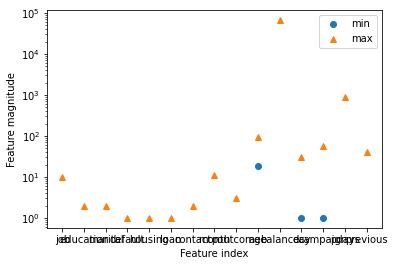

In [ ]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=1)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [ ]:
svc_rbf = SVC(C=100, gamma=0.13,kernel='rbf',probability=True)
svc_rbf.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc_rbf.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc_rbf.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.88


#### 1.2 SVM sigmoid

In [ ]:
svc_sigmoid = SVC(C=100, gamma=0.13,kernel='sigmoid',probability=True)
svc_sigmoid.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc_sigmoid.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc_sigmoid.score(X_test, y_test)))

Accuracy on training set: 0.79
Accuracy on test set: 0.79


#### 1.3 SVM Normalizado

In [ ]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled2 = (X_train - min_on_training) / range_on_training

#print("Minimum for each feature\n{}".format(X_train_scaled2.min(axis=0)))
#print("Maximum for each feature\n {}".format(X_train_scaled2.max(axis=0)))

Text(0, 0.5, 'Feature magnitude')

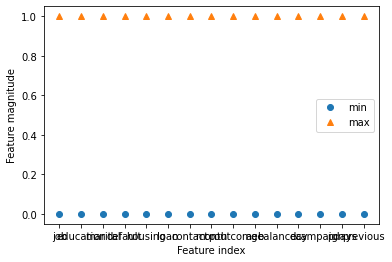

In [ ]:
X_test_scaled2 = (X_test - min_on_training) / range_on_training
plt.figure()
plt.plot(X_train_scaled2.min(axis=0), 'o', label="min")
plt.plot(X_train_scaled2.max(axis=0), '^', label="max")
plt.legend(loc=5)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [ ]:

svc2 = SVC(C=100, gamma=0.1,probability=True)
svc2.fit(X_train_scaled2, y_train)
print("Accuracy on training set: {:.3f}".format(
svc2.score(X_train_scaled2, y_train)))
print("Accuracy on test set: {:.3f}".format(svc2.score(X_test_scaled2, y_test)))

Accuracy on training set: 0.892
Accuracy on test set: 0.893


In [ ]:
y_pred_svc = svc_rbf.predict(X_test)
print("Matriz de confusión")
print(confusion_matrix(y_test, y_pred_svc))

a, b, c, d = confusion_matrix(y_test, y_pred_svc).ravel()

print("Error:",(b+c)/(a+b+c+d))
print("FP:",(b)/(a+b))
print("FN:",(c)/(c+d))

print("Precisión:",(a+d)/(a+b+c+d))
print("PP:",(d)/(c+d))
print("PN:",(a)/(a+b))

Matriz de confusión
[[7620   13]
 [1003    1]]
Error: 0.11763343753618155
FP: 0.0017031311410978646
FN: 0.999003984063745
Precisión: 0.8823665624638185
PP: 0.00099601593625498
PN: 0.9982968688589021


In [ ]:

from tabulate import tabulate
table = [["Modelo",'Accuracy on training', 'Accuracy on testing' ],
         ["rbf",svc_rbf.score(X_train, y_train),svc_rbf.score(X_test, y_test)], 
         ["sigmoid",svc_sigmoid.score(X_train, y_train),svc_sigmoid.score(X_test, y_test)],
          ["normalizado",svc2.score(X_train_scaled2, y_train),svc2.score(X_test_scaled2, y_test)]]
print(tabulate(table, headers='firstrow',tablefmt='fancy_grid'))

╒═════════════╤════════════════════════╤═══════════════════════╕
│ Modelo      │   Accuracy on training │   Accuracy on testing │
╞═════════════╪════════════════════════╪═══════════════════════╡
│ rbf         │               1        │              0.882367 │
├─────────────┼────────────────────────┼───────────────────────┤
│ sigmoid     │               0.787774 │              0.786268 │
├─────────────┼────────────────────────┼───────────────────────┤
│ normalizado │               0.891571 │              0.893134 │
╘═════════════╧════════════════════════╧═══════════════════════╛


Como se observa en la tabla el mejor modelo es el SVC rfb, pues tiene las mejores precisiones.

### 2. Bayes

Teorema de Bayes: 

El objetivo de un sistema Bayesiano es saber cual es la hipótesis 
más probable entre varios conjuntos de datos. Si P(D) es la 
probabilidad a priori de los datos, P(D|h) su probabilidad dada 
una hipótesis y se desea estimar P(h|D), la probabilidad posterior 
de h dados los datos.

#### 2.1 Bayes Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbg = GaussianNB().fit(X_train, y_train)
print("Training set score: {:.3f}".format(nbg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(nbg.score(X_test, y_test)))

Training set score: 0.811
Test set score: 0.811


#### 2.2 Bayes Bernoulli

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BB = BernoulliNB()
BB.fit(X_train, y_train)
print("Training set score: {:.3f}".format(BB.score(X_train, y_train)))
print("Test set score: {:.3f}".format(BB.score(X_test, y_test)))

Training set score: 0.868
Test set score: 0.868


In [ ]:
from tabulate import tabulate
table = [["Modelo",'Accuracy on training', 'Accuracy on testing' ], 
        ["Bernoulli",BB.score(X_train, y_train),BB.score(X_test, y_test)], 
         ["Gaussian",nbg.score(X_train, y_train),nbg.score(X_test, y_test)]]
print(tabulate(table, headers='firstrow',tablefmt='fancy_grid'))

╒═══════════╤════════════════════════╤═══════════════════════╕
│ Modelo    │   Accuracy on training │   Accuracy on testing │
╞═══════════╪════════════════════════╪═══════════════════════╡
│ Bernoulli │               0.868357 │              0.867894 │
├───────────┼────────────────────────┼───────────────────────┤
│ Gaussian  │               0.811335 │              0.810814 │
╘═══════════╧════════════════════════╧═══════════════════════╛


In [ ]:
y_pred_BB= BB.predict(X_test)
print("Matriz de confusión")
matrizBB=confusion_matrix(y_test, y_pred_BB)
print(matrizBB)

a, b, c, d = confusion_matrix(y_test, y_pred_BB).ravel()

print("Error:",(b+c)/(a+b+c+d))
print("FP:",(b)/(a+b))
print("FN:",(c)/(c+d))

print("Precisión:",(a+d)/(a+b+c+d))
print("PP:",(d)/(c+d))
print("PN:",(a)/(a+b))

Matriz de confusión
[[7280  353]
 [ 788  216]]
Error: 0.1321060553432905
FP: 0.04624656098519586
FN: 0.7848605577689243
Precisión: 0.8678939446567095
PP: 0.2151394422310757
PN: 0.9537534390148041


El modelo selecccionado es el de Bayes con bernoulli, ya que tiene mayores precisiones, al detectar la clasificación del si se toma el depósito a plazo se obtiene una precisión de training del 86,84% y la precisión de testing es de 86,79%. 


### 3. KNN
El algoritmo clasifica cada dato nuevo en el grupo que corresponda, según tenga k vecinos más cerca de un grupo o de otro. Es decir, calcula la distancia del elemento nuevo a cada uno de los existentes, y ordena dichas distancias de menor a mayor para ir seleccionando el grupo al que pertenecer. Este grupo será, por tanto, el de mayor frecuencia con menores distancias.

In [ ]:
training_accuracy = []
test_accuracy = []

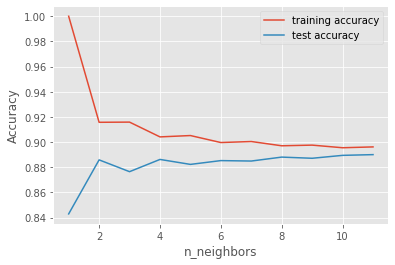

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

neighbors_settings = range(1, 12)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    KNeighborsModel = KNeighborsClassifier(n_neighbors=n_neighbors)
    KNeighborsModel.fit(X_train_scaled, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(KNeighborsModel.score(X_train_scaled, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(KNeighborsModel.score(X_test_scaled, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

En el gráfico anterior se observa como la predicción para test y train se estabiliza cuando se utilizan 6 vecinos, entonces se usan 6 para crear el mejor modelo. Aparte de que se probaron con cantidades diferentes y sus pre

In [ ]:
KNeighborsModel=KNeighborsClassifier(n_neighbors = 6)
KNeighborsModel.fit(X_train, y_train)
print("Training set score: {:.3f}".format(KNeighborsModel.score(X_train, y_train)))
print("Test set score: {:.3f}".format(KNeighborsModel.score(X_test, y_test)))

Training set score: 0.892
Test set score: 0.884


In [ ]:
y_pred_KNN = KNeighborsModel.predict(X_test)
print("Matriz de confusión")
print(confusion_matrix(y_test, y_pred_KNN))

a, b, c, d = confusion_matrix(y_test, y_pred_KNN).ravel()

print("Error:",(b+c)/(a+b+c+d))
print("FP:",(b)/(a+b))
print("FN:",(c)/(c+d))

print("Precisión:",(a+d)/(a+b+c+d))
print("PP:",(d)/(c+d))
print("PN:",(a)/(a+b))

Matriz de confusión
[[7567   66]
 [ 933   71]]
Error: 0.11566516151441472
FP: 0.00864666579326608
FN: 0.9292828685258964
Precisión: 0.8843348384855853
PP: 0.07071713147410359
PN: 0.9913533342067339



### 4. Decision Trees
Árboles de decisión es una técnica muy utilizada para clasificar, este método se basa en el
algoritmo de Hunt para llevar a cabo la clasificación.
El esqueleto de este método para construir un árbol de decisión a partir de un conjunto T de datos de entrenamiento es muy simple. Sean las clases {C1, C2,. . ., Ck}.
Existen tres posibilidades:
1. T contiene uno o más casos, todos pertenecientes a una única clase Cj: El árbol de
decisión para T es una hoja identificando la clase Cj.
2. T no contiene ningún caso: El árbol de decisión es una hoja, pero la clase asociada
debe ser determinada por información que no pertenece a T. Por ejemplo, una hoja
puede escogerse de acuerdo a conocimientos de base del dominio, como ser la clase
mayoritaria.
3. T contiene casos pertenecientes a varias clases: En este caso, la idea es refinar T en
subconjuntos de casos que tiendan, o parezcan tender hacia una colección de casos
pertenecientes a una única clase. Se elige una prueba basada en un único. (López, B.
2005)

#### Decision Tree 1


In [ ]:
DecisionTreeModel = DecisionTreeClassifier(max_depth=6)
DecisionTreeModel.fit(X_train, y_train)
print("Training set score: {:.3f}".format(DecisionTreeModel.score(X_train, y_train)))
print("Test set score: {:.3f}".format(DecisionTreeModel.score(X_test, y_test)))

Training set score: 0.895
Test set score: 0.893


#### Decision Tree 2

In [ ]:
DecisionTreeModel2 = DecisionTreeClassifier(max_depth=12)
DecisionTreeModel2.fit(X_train, y_train)
print("Training set score: {:.3f}".format(DecisionTreeModel2.score(X_train, y_train)))
print("Test set score: {:.3f}".format(DecisionTreeModel2.score(X_test, y_test)))

Training set score: 0.919
Test set score: 0.884


#### Decision Tree 3

In [ ]:
DecisionTreeModel3 = DecisionTreeClassifier(max_depth=3)
DecisionTreeModel3.fit(X_train, y_train)
print("Training set score: {:.3f}".format(DecisionTreeModel3.score(X_train, y_train)))
print("Test set score: {:.3f}".format(DecisionTreeModel3.score(X_test, y_test)))

Training set score: 0.885
Test set score: 0.882


In [ ]:
from tabulate import tabulate
table = [["Modelo",'Accuracy on training', 'Accuracy on testing' ], 
        ["Tree 1",DecisionTreeModel.score(X_train, y_train),DecisionTreeModel.score(X_test, y_test)], 
         ["Tree 2",DecisionTreeModel2.score(X_train, y_train),DecisionTreeModel2.score(X_test, y_test)],
         ["Tree 3",DecisionTreeModel3.score(X_train, y_train),DecisionTreeModel3.score(X_test, y_test)]]
print(tabulate(table, headers='firstrow',tablefmt='fancy_grid'))

╒══════════╤════════════════════════╤═══════════════════════╕
│ Modelo   │   Accuracy on training │   Accuracy on testing │
╞══════════╪════════════════════════╪═══════════════════════╡
│ Tree 1   │               0.895016 │              0.893018 │
├──────────┼────────────────────────┼───────────────────────┤
│ Tree 2   │               0.919388 │              0.884219 │
├──────────┼────────────────────────┼───────────────────────┤
│ Tree 3   │               0.884798 │              0.882482 │
╘══════════╧════════════════════════╧═══════════════════════╛


Para detectar la clasificación de si el cliente se subscribe al depósito a plazo se obtiene una precisión con respecto al training del 91,95% y la precisión del testing es de 88,38% . Estos 
índices de precisión señalan que es un buen modelo predictivo y el que cuenta  con estos índices es el 2 que son un poco mejores que los de los otros modelos.

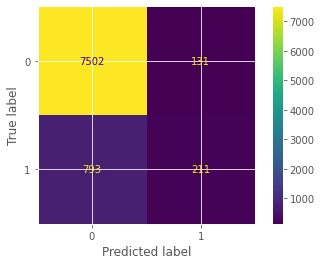

In [ ]:
plot_confusion_matrix(DecisionTreeModel, X_test, y_test,values_format="d")  
plt.show()

In [ ]:
y_pred = DecisionTreeModel2.predict(X_test)
print("Matriz de confusión")
print(confusion_matrix(y_test, y_pred))

a, b, c, d = confusion_matrix(y_test, y_pred).ravel()

print("Error:",(b+c)/(a+b+c+d))
print("FP:",(b)/(a+b))
print("FN:",(c)/(c+d))

print("Precisión:",(a+d)/(a+b+c+d))
print("PP:",(d)/(c+d))
print("PN:",(a)/(a+b))

Matriz de confusión
[[7385  248]
 [ 752  252]]
Error: 0.1157809424568716
FP: 0.03249050176863619
FN: 0.749003984063745
Precisión: 0.8842190575431284
PP: 0.250996015936255
PN: 0.9675094982313638


### 5. Random Forest

Según Medina (2017) el algoritmo de Random Forest surge como la
agrupación de varios árboles de clasificación; básicamente selecciona de manera aleatoria
una cantidad de variables con las cuales se construye cada uno de los árboles individuales, y
se realizan predicciones con estas variables que posteriormente serán ponderadas a través
del cálculo de la clase más votada de los árboles que se generaron, para finalmente hacer la
predicción por Random Forest. Este método usa la agregación de de bootstrap llamado
bagging para combinar diferentes árboles.

####  Random Forest Original

In [ ]:
RandomForest = RandomForestClassifier(max_depth=18,random_state=9, min_samples_leaf=9, min_samples_split=100, n_estimators=100)
RandomForest.fit(X_train, y_train)
print("Training set score: {:.3f}".format(RandomForest.score(X_train, y_train)))
print("Test set score: {:.3f}".format(RandomForest.score(X_test, y_test)))

Training set score: 0.895
Test set score: 0.898


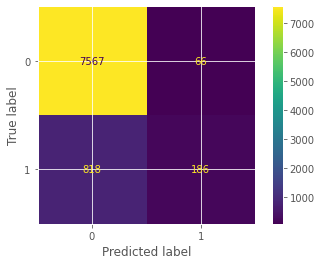

In [ ]:

plot_confusion_matrix(RandomForest, X_test, y_test,values_format="d")  
plt.show()

####  Random Forest más simple

In [ ]:
importances=pd.DataFrame({"feature": X_train.columns, "importance": RandomForest.feature_importances_})
importances= importances.sort_values("importance", ascending=False).set_index("feature")
importances.head(11)

,importance
feature,
poutcome,0.194694
month,0.160621
age,0.121203
pdays,0.105795
housing,0.079940
balance,0.069156
day,0.066731
previous,0.049434
contact,0.047952


Se decide quitar de la base las variables predictoras con una importancia menor a 4%.

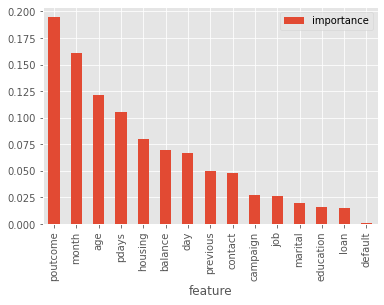

In [ ]:
plt.style.use("ggplot")
importances.plot.bar()

In [ ]:
features2=["age","housing","day","balance","contact","month","pdays","previous","poutcome"]
X2_train= X_train[features2]
X2_test= X_test[features2]

In [ ]:
RandomForest2 = RandomForestClassifier(max_depth=18,random_state=9, min_samples_leaf=9, min_samples_split=100, n_estimators=100)
RandomForest2.fit(X2_train, y_train)
print("Training set score: {:.3f}".format(RandomForest2.score(X2_train, y_train)))
print("Test set score: {:.3f}".format(RandomForest2.score(X2_test, y_test)))

Training set score: 0.897
Test set score: 0.896


In [ ]:
from tabulate import tabulate
table = [["Modelo",'Accuracy on training', 'Accuracy on testing', "Number of features" ], 
        ["RF original",RandomForest.score(X_train, y_train),RandomForest.score(X_test, y_test),15], 
         ["RF 2",RandomForest2.score(X2_train, y_train),RandomForest2.score(X2_test, y_test),9]]
print(tabulate(table, headers='firstrow',tablefmt='fancy_grid'))

╒═════════════╤════════════════════════╤═══════════════════════╤══════════════════════╕
│ Modelo      │   Accuracy on training │   Accuracy on testing │   Number of features │
╞═════════════╪════════════════════════╪═══════════════════════╪══════════════════════╡
│ RF original │               0.895334 │               0.89765 │                   15 │
├─────────────┼────────────────────────┼───────────────────────┼──────────────────────┤
│ RF 2        │               0.896984 │               0.89626 │                    9 │
╘═════════════╧════════════════════════╧═══════════════════════╧══════════════════════╛


In [ ]:
y_pred = RandomForest2.predict(X2_test)
print("Matriz de confusión")
print(confusion_matrix(y_test, y_pred))

a, b, c, d = confusion_matrix(y_test, y_pred).ravel()

print("Error:",(b+c)/(a+b+c+d))
print("FP:",(b)/(a+b))
print("FN:",(c)/(c+d))

print("Precisión:",(a+d)/(a+b+c+d))
print("PP:",(d)/(c+d))
print("PN:",(a)/(a+b))

Matriz de confusión
[[7543   90]
 [ 806  198]]
Error: 0.10373972444135696
FP: 0.011790907899908293
FN: 0.8027888446215139
Precisión: 0.8962602755586431
PP: 0.19721115537848605
PN: 0.9882090921000917


Según el gráfico de Importancia de las Variables 
del modelo tienen mejor poder predictivo cuando se utilizan menos variables, aparte siempre se prefiere un modelo más simple.

### 6. Regresión Logística


En la regresión logística se busca una función que opere como una probabilidad, 0 < p < 1.

Tenemos el parámetro C que nos ayuda a controlar la regularización, un C bajo regula menos y el modelo se ajusta mejor a los datos del training y uno alto ayuda a que los coeficientes sean cercanos a 0.

Como experimento se realizan dos modelos con distinto C. Al observar que el resultado no varía se decide continuar con el primer modelo.

In [ ]:

from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression(random_state=0,C=1)
reg_log.fit(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(reg_log.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(reg_log.score(X_test_scaled, y_test)))


reg_log2 = LogisticRegression(random_state=0,C=100)
reg_log2.fit(X_train_scaled, y_train)
print("Training set score: {:.3f}".format(reg_log2.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(reg_log2.score(X_test_scaled, y_test)))

Training set score: 0.883
Test set score: 0.883
Training set score: 0.883
Test set score: 0.883


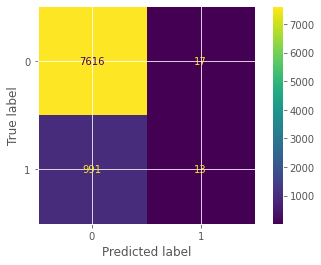

In [ ]:
plot_confusion_matrix(reg_log, X_test_scaled, y_test,values_format="d")  
plt.show()


In [ ]:
from tabulate import tabulate
table = [["Modelo",'Accuracy on training', 'Accuracy on testing', "Number of features" ], 
        ["Reg original",reg_log.score(X_train_scaled, y_train),reg_log.score(X_test_scaled, y_test)], 
         ["Reg 2",reg_log2.score(X_train_scaled, y_train),reg_log2.score(X_test_scaled, y_test)]]
print(tabulate(table, headers='firstrow',tablefmt='fancy_grid'))

╒══════════════╤════════════════════════╤═══════════════════════╕
│ Modelo       │   Accuracy on training │   Accuracy on testing │
╞══════════════╪════════════════════════╪═══════════════════════╡
│ Reg original │               0.883235 │              0.883293 │
├──────────────┼────────────────────────┼───────────────────────┤
│ Reg 2        │               0.883264 │              0.883293 │
╘══════════════╧════════════════════════╧═══════════════════════╛


In [ ]:
y_pred = reg_log.predict(X_test_scaled)
print("Matriz de confusión")
print(confusion_matrix(y_test, y_pred))

a, b, c, d = confusion_matrix(y_test, y_pred).ravel()

print("Error:",(b+c)/(a+b+c+d))
print("FP:",(b)/(a+b))
print("FN:",(c)/(c+d))

print("Precisión:",(a+d)/(a+b+c+d))
print("PP:",(d)/(c+d))
print("PN:",(a)/(a+b))

Matriz de confusión
[[7616   17]
 [ 991   13]]
Error: 0.11670718999652657
FP: 0.0022271714922048997
FN: 0.9870517928286853
Precisión: 0.8832928100034735
PP: 0.012948207171314742
PN: 0.9977728285077951


En este caso al no haber diferencia entre la presición de los modelos cuando las variables se estandarizan o no, se decide utilizar el modelo original.

### 7. Agregación de bootstrap (bagging)

Este modelo ajusta los clasificadores en subconjuntos aleatorios del conjunto de datos original. Luego agrega sus predicciones individuales (ya sea por votación o promediando) para formar una predicción final lo que permite reducir sesgo y varianza.


In [ ]:
Bagging = BaggingClassifier(base_estimator=SVC(), random_state=0)
Bagging.fit(X_train, y_train)

print("Training set score: {:.3f}".format(Bagging.score(X_train, y_train)))
print("Test set score: {:.3f}".format(Bagging.score(X_test, y_test)))

Training set score: 0.884
Test set score: 0.884


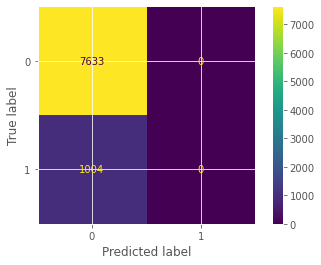

In [ ]:
plot_confusion_matrix(Bagging, X_test, y_test,values_format="d")  
plt.show()

In [ ]:
y_pred = Bagging.predict(X_test)
print("Matriz de confusión")
print(confusion_matrix(y_test, y_pred))

a, b, c, d = confusion_matrix(y_test, y_pred).ravel()

print("Error:",(b+c)/(a+b+c+d))
print("FP:",(b)/(a+b))
print("FN:",(c)/(c+d))

print("Precisión:",(a+d)/(a+b+c+d))
print("PP:",(d)/(c+d))
print("PN:",(a)/(a+b))

Matriz de confusión
[[7633    0]
 [1004    0]]
Error: 0.11624406622669908
FP: 0.0
FN: 1.0
Precisión: 0.8837559337733009
PP: 0.0
PN: 1.0


### 8. Redes Neuronales Artificiales (ANN)



En los modelos de ANN el procesamiento es distinto, se deben transformar las variables categóricas en numéricas haciendo el One Hote Encode. 
Luego se dividen los datos en training y testing.	

In [ ]:
processed_dataX= pd.get_dummies(X, columns=['job', 'education', 'marital','default', 'housing', 'loan', 'contact',"month","poutcome"])

processed_dataX.head()


,age,balance,day,campaign,pdays,previous,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,education_0,education_1,education_2,marital_0,marital_1,marital_2,default_0,default_1,housing_0,housing_1,loan_0,loan_1,contact_0,contact_1,contact_2,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_0,poutcome_1,poutcome_2,poutcome_3
0,58,2143,5,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,29,5,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,2,5,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,35,231,5,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6,28,447,5,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
import tensorflow as tf
import keras
from keras.utils import np_utils
X1 = np.array(processed_dataX)[:,0:]
X1 = X1.astype('float32')
y1 = tf.keras.utils.to_categorical(data["y"],2)

In [ ]:
print("Shape of X:", X1.shape)
print("\nShape of y:", y1.shape)


Shape of X: (43185, 48)

Shape of y: (43185, 2)


In [ ]:
(X_train_ANN, X_test_ANN) = X1[8637:], X1[:8637]
(y_train_ANN, y_test_ANN) = y1[8637:], y1[:8637]

# print shape of training set
print('x_train shape:', X_train_ANN.shape)

# print number of training, validation, and test images
print(X_train_ANN.shape[0], 'train samples')
print(X_test_ANN.shape[0], 'test samples')

x_train shape: (34548, 48)
34548 train samples
8637 test samples


Se va a utilizar ReLU como función de activación, ya que es más fácil de entrenar y, a menudo, logra un mejor rendimiento. Esta genera la entrada directamente si es positiva, de lo contrario genera un cero.

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
# Building the model

model_ANN = Sequential()

model_ANN.add(Dense(128, input_dim=48))
model_ANN.add(Activation('relu'))

model_ANN.add(Dense(64))
model_ANN.add(Activation('relu'))

model_ANN.add(Dense(2))
model_ANN.add(Activation('sigmoid'))

# Compiling the model
model_ANN.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6272      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
 activation_2 (Activation)   (None, 2)                 0         
                                                                 
Total params: 14,658
Trainable params: 14,658
Non-traina

Después de varios experimentos se elige un epoch de 200 y batch de 500, con estos el modelo tiene un Accuracy alto en training y testing.
 


In [ ]:
model_ANN.fit(X_train_ANN, y_train_ANN, epochs=200, batch_size=500, verbose=0)


In [ ]:
# Evaluating the model on the training and testing set
score_ANN = model_ANN.evaluate(X_train_ANN, y_train_ANN)
print("\n Training Accuracy:", score_ANN[1])
score_ANN = model_ANN.evaluate(X_test_ANN, y_test_ANN)
print("\n Testing Accuracy:", score_ANN[1])

1080/1080 [==============================] - 2s 1ms/step - loss: 0.3218 - accuracy: 0.8773

 Training Accuracy: 0.8773300647735596
270/270 [==============================] - 0s 1ms/step - loss: 0.1732 - accuracy: 0.9633

 Testing Accuracy: 0.963297426700592


In [ ]:
ANN=model_ANN.fit(X_train_ANN, y_train_ANN, epochs=200, batch_size=500, verbose=0,validation_data=(X_test_ANN, y_test_ANN))


Al graficar el Accuracy podemos observar que con forme aumenta el epoch el Training Accuracy aumenta y el Validation Accuracy se estabiliza. Con el Training Loss observamos que disminuye al aumentar el epoch y el Validation Loss aumenta.

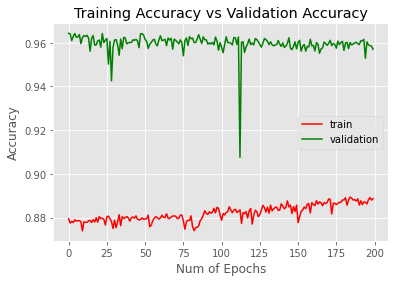

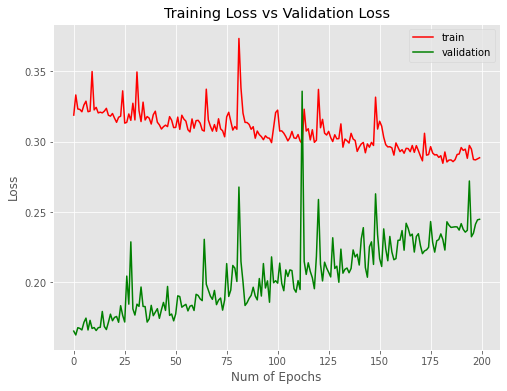

In [ ]:

plt.figure(0)  
plt.plot(ANN.history['accuracy'],'r')  
plt.plot(ANN.history['val_accuracy'],'g')  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(ANN.history['loss'],'r')  
plt.plot(ANN.history['val_loss'],'g')  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()

In [ ]:
ypred1= model_ANN.predict(X_test_ANN, batch_size=500) 
y_pred = np.argmax(ypred1, axis=1) 

print("Matriz de confusión")
print(confusion_matrix(y_test, y_pred))

a, b, c, d = confusion_matrix(y_test, y_pred).ravel()

print("Error:",(b+c)/(a+b+c+d))
print("FP:",(b)/(a+b))
print("FN:",(c)/(c+d))

print("Precisión:",(a+d)/(a+b+c+d))
print("PP:",(d)/(c+d))
print("PN:",(a)/(a+b))


Matriz de confusión
[[7554   79]
 [ 996    8]]
Error: 0.12446451314113696
FP: 0.010349796934363945
FN: 0.9920318725099602
Precisión: 0.8755354868588631
PP: 0.00796812749003984
PN: 0.989650203065636


## Selección del mejor modelo

### Probabilidades de Predicción

In [ ]:
r_prob= [0 for _ in range(len(y_test))]
svc_prob= svc_rbf.predict_proba(X_test)
BB_prob= BB.predict_proba(X_test)
tree_prob= DecisionTreeModel2.predict_proba(X_test)
RF2_prob=RandomForest2.predict_proba(X2_test)
KNeighbors_prob= KNeighborsModel.predict_proba(X_test)
log_prob= reg_log.predict_proba(X_test_scaled)
Bagging_prob=Bagging.predict_proba(X_test)
ANN_prob1= model_ANN.predict(X_test_ANN, batch_size=500) 
ANN_prob = np.argmax(ANN_prob1, axis=1) 

In [ ]:
svc_prob= svc_prob[:, 1]
BB_prob= BB_prob[:, 1]
tree_prob= tree_prob[:, 1]
RF2_prob= RF2_prob[:, 1]
KNeighbors_prob= KNeighbors_prob[:, 1]
log_prob= log_prob[:, 1]
Bagging_prob= Bagging_prob[:, 1]

In [ ]:
r_auc=roc_auc_score(y_test,r_prob)
svc_auc=roc_auc_score(y_test,svc_prob)
tree_auc= roc_auc_score(y_test,tree_prob)
RF2_auc= roc_auc_score(y_test,RF2_prob)
BB_auc= roc_auc_score(y_test,BB_prob)
KNeighbors_auc= roc_auc_score(y_test,KNeighbors_prob)
log_auc= roc_auc_score(y_test,log_prob)
Bagging_auc=roc_auc_score(y_test,Bagging_prob)
ANN_auc=roc_auc_score(y_test,ANN_prob)

In [ ]:
print("Random(Chance) : AUROC = %.3f" % (r_auc))
print("SVC : AUROC = %.3f" % (svc_auc))
print("Bayes : AUROC = %.3f" % (BB_auc))
print("Decision Tree : AUROC = %.3f" % (tree_auc))
print("Random Forest : AUROC = %.3f" % (RF2_auc))
print("KNeighbors : AUROC = %.3f" % (KNeighbors_auc))
print("Logistic : AUROC = %.3f" % (log_auc))
print("Baging : AUROC = %.3f" % (Bagging_auc))
print("ANN : AUROC = %.3f" % (ANN_auc))

Random(Chance) : AUROC = 0.500
SVC : AUROC = 0.625
Bayes : AUROC = 0.705
Decision Tree : AUROC = 0.678
Random Forest : AUROC = 0.789
KNeighbors : AUROC = 0.628
Logistic : AUROC = 0.722
Baging : AUROC = 0.500
ANN : AUROC = 0.499


### Calcular ROC

In [ ]:
r_fpr, r_tpr, _=roc_curve(y_test,r_prob)
svc_fpr, svc_tpr, _=roc_curve(y_test,svc_prob)
BB_fpr, BB_tpr, _=roc_curve(y_test,BB_prob)
tree_fpr, tree_tpr, _=roc_curve(y_test,tree_prob)
rf2_fpr, rf2_tpr, _=roc_curve(y_test,RF2_prob)
kn_fpr, kn_tpr, _=roc_curve(y_test,KNeighbors_prob)
log_fpr, log_tpr, _=roc_curve(y_test,log_prob)
bg_fpr, bg_tpr, _=roc_curve(y_test,Bagging_prob)
ann_fpr, ann_tpr, _=roc_curve(y_test,ANN_prob)

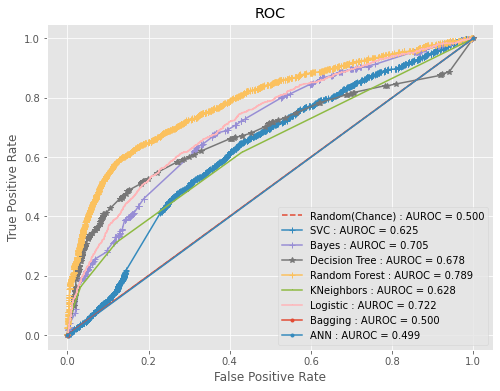

In [ ]:

plt.plot(r_fpr, r_tpr, linestyle="--", label= "Random(Chance) : AUROC = %.3f" % (r_auc))
plt.plot(svc_fpr, svc_tpr, marker="+", label= "SVC : AUROC = %.3f" % (svc_auc))
plt.plot(BB_fpr, BB_tpr, marker="+", label= "Bayes : AUROC = %.3f" % (BB_auc))
plt.plot(tree_fpr, tree_tpr, marker="*", label= "Decision Tree : AUROC = %.3f" % (tree_auc))
plt.plot(rf2_fpr, rf2_tpr, marker="+", label= "Random Forest : AUROC = %.3f" % (RF2_auc))
plt.plot(kn_fpr, kn_tpr, marker=",", label= "KNeighbors : AUROC = %.3f" % (KNeighbors_auc))
plt.plot(log_fpr, log_tpr, marker=",", label= "Logistic : AUROC = %.3f" % (log_auc))
plt.plot(bg_fpr, bg_tpr, marker=".", label= "Bagging : AUROC = %.3f" % (Bagging_auc))
plt.plot(ann_fpr, ann_tpr, marker=".", label= "ANN : AUROC = %.3f" % (ANN_auc))
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [ ]:
#pip install tabulate

from tabulate import tabulate
table = [["Modelo",'Error', 'FP', 'FN',"Precisión","PP","PN","AUCROC"], 
["SVC",0.1176 , 0.0017, 0.9990,0.8824,0.0009,0.9983,svc_auc],
["Bayes", 0.1321,0.0462,  0.7849, 0.8679, 0.2251, 0.9538,BB_auc],
["KNeighbors",0.1157 ,0.0086,0.9293,0.8843,0.0707,0.9914,KNeighbors_auc],
["Decision Tree",0.1151, 0.0314,0.7510, 0.8849, 0.249, 0.9686,tree_auc],
["Random Forest",0.1037,0.0118,0.8028,0.8963,0.1973,0.9882,RF2_auc],
["Logistic",0.1167,0.0022,0.9870,0.8833, 0.0129,0.9978,log_auc],
["Bagging",0.1162, 0.0, 1.0,0.8837,0.0,1.0, Bagging_auc],
["ANN",0.1195, 0.0041, 0.9970,0.8805,0.0030,0.9959, ANN_auc]]
print(tabulate(table, headers='firstrow',tablefmt='fancy_grid'))



╒═══════════════╤═════════╤════════╤════════╤═════════════╤════════╤════════╤══════════╕
│ Modelo        │   Error │     FP │     FN │   Precisión │     PP │     PN │   AUCROC │
╞═══════════════╪═════════╪════════╪════════╪═════════════╪════════╪════════╪══════════╡
│ SVC           │  0.1176 │ 0.0017 │ 0.999  │      0.8824 │ 0.0009 │ 0.9983 │ 0.625485 │
├───────────────┼─────────┼────────┼────────┼─────────────┼────────┼────────┼──────────┤
│ Bayes         │  0.1321 │ 0.0462 │ 0.7849 │      0.8679 │ 0.2251 │ 0.9538 │ 0.705141 │
├───────────────┼─────────┼────────┼────────┼─────────────┼────────┼────────┼──────────┤
│ KNeighbors    │  0.1157 │ 0.0086 │ 0.9293 │      0.8843 │ 0.0707 │ 0.9914 │ 0.628128 │
├───────────────┼─────────┼────────┼────────┼─────────────┼────────┼────────┼──────────┤
│ Decision Tree │  0.1151 │ 0.0314 │ 0.751  │      0.8849 │ 0.249  │ 0.9686 │ 0.677952 │
├───────────────┼─────────┼────────┼────────┼─────────────┼────────┼────────┼──────────┤
│ Random Forest │  0.

En la fase de modelado se exploró por medio de varias medidas de precisión cual era el modelo más destacado utilizando el AUC, error global, precisión global, precisión positiva y negativa, donde se determinó que el mejor era Random Forest y el segundo mejor fueron los árboles de decisión

## Conclusiones

Los modelos en la mayoría de indicadores tienen resultados similares, sin embargo, el que destaca es Random Forest al presentar un mejor AUC, error, precisión global y ocupa la tercera posición en el PP.

La PN de este modelo es muy alta, por lo que predice bien si un cliente **no va a suscribirse** en el depósito a plazo.  Por el contrario,la PP es muy baja, es decir, no va a predecir bien si un cliente se suscribe para términos del problema es más relevante saber ésto. 

Esta limitante se puede dar debido a que la proporción de los que si aceptaron el depósito es muy pequeña (11.7%) y por esto el modelo no logra predecir bien esta clase. También, se pueden presentar otras variables relacionadas con el contexto, por ejemplo pudo afectar la crisis financiera en el 2008 que afectó a Portugal y generó pérdidas en bancos privados y públicos.

Por otra parte, pudo suceder que las condiciones del depósito a plazo no son suficientemente atractivas para atraer una gran cantidad de suscripciones pero esto no lo podemos confirmar, se necesitan otros estudios, como un estudio de mercado.

Por lo tanto, si se desea utilizar este modelo para predecir las decisiones de los clientes, se debe enfocar en los que no deciden suscribirse y pensar en que formas se podría convencer a estos posibles clientes.

Finalmente, para comprender mejor esto podemos poner atención a los atributos con mayor importancia, donde destaca el resultado de la campaña anterior, es decir, clientes que no se suscribieron antes y clientes con resultado desconocido (no contactados antes) difícilmente lo van a hacer ahora .
Otro atributo de interés es el mes, vemos que la mayor cantidad de llamadas se hicieron de mayo a agosto, se puede suponer que no son las mejores fechas para buscar nuevas suscripciones.


<Figure size 576x432 with 0 Axes>

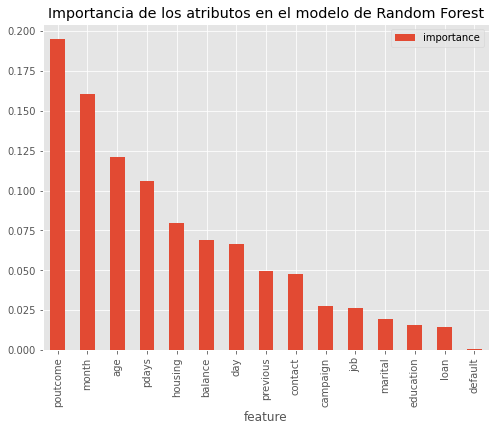

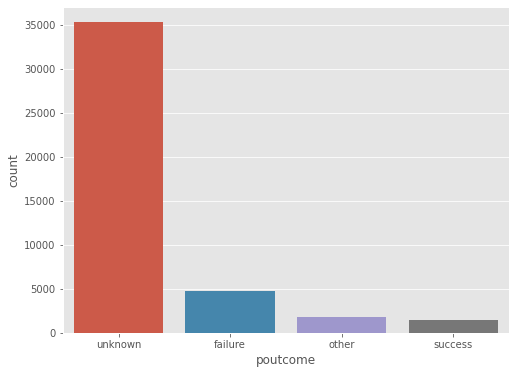

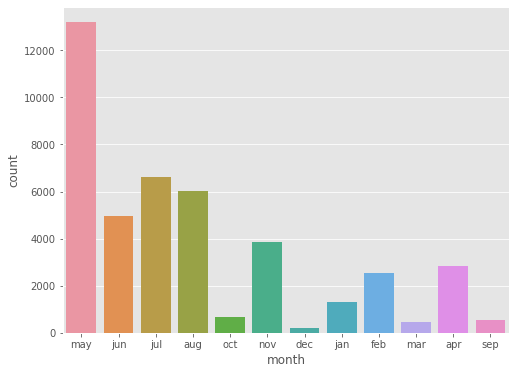

In [ ]:
plt.figure(0)  
plt.style.use("ggplot")
importances.plot.bar()
plt.title("Importancia de los atributos en el modelo de Random Forest")
plt.show()

plt.figure(1)
sns.countplot(x = data['poutcome'])
plt.show()



plt.figure(2)  
sns.countplot(x = data['month'])
plt.show()

## Referencias bibliográficas

López, B. (2005). Inteligencia Artificial. Instituto Tecnológico Nuevo Laredo. Recuperado de:
http://www.itnuevolaredo.edu.mx/takeyas/Apuntes/Inteligencia%20Artificial/Apuntes/tareas_alu
mnos/C4.5/C4.5(2005-II-B).pdf

Medina-Merino, R., &amp; Ñique-Chacón, C. (2017). Bosques aleatorios como extensión de los árboles
de clasificación con los programas R y Python. Interfases, 0(010), 165-189. Recuperado de:
http://dx.doi.org/10.26439/interfases2017.n10.1775

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press. 
Recuperado de:
http://dx.doi.org/10.1016/j.dss.2014.03.001

